In [6]:
import cv2
import numpy as np

In [9]:
def detectAndDisplay(frame):
    # pass the blob through the model and obtain the detections
    model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)
    
    # resize to 300x300 and then normalizing
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
    
    model.setInput(blob)
    # detection 결과
    detections = model.forward()
    
    #detection 결과 출력
    for i in range(0, detections.shape[2]):
        # 얼마나 가까운지에 대한 값(확신 정도)
        confidence = detections[0, 0, i, 2]
        # min_confidence = 0.5
        if confidence > min_confidence:
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = box.astype("int")
            print(confidence, startX, startY, endX, endY)
            # draw box and text
            text = "{:.2f}%".format(confidence*100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
            
    cv2.imshow("Face Det by dnn", frame)

In [ ]:
# model(train 결과 모델 사용)
model_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/res10_300x300_ssd_iter_140000.caffemodel'
# model 구조 확인
prototxt_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/deploy.prototxt.txt'
min_confidence = 0.5
file_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/image/soccer_01.jpg'
# file_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/image/img_100029.jpg'

img = cv2.imread(file_name)
(height, width) = img.shape[:2]

cv2.imshow("Or",img)
detectAndDisplay(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

0.90979505 342 153 386 209
0.90857255 682 121 727 176
0.9048406 671 46 718 99
0.86153173 252 145 293 201
0.7994519 227 49 270 99
0.7642292 459 128 507 185
0.58851874 113 63 155 109
0.5546767 582 136 622 188
0.50194585 567 74 607 121


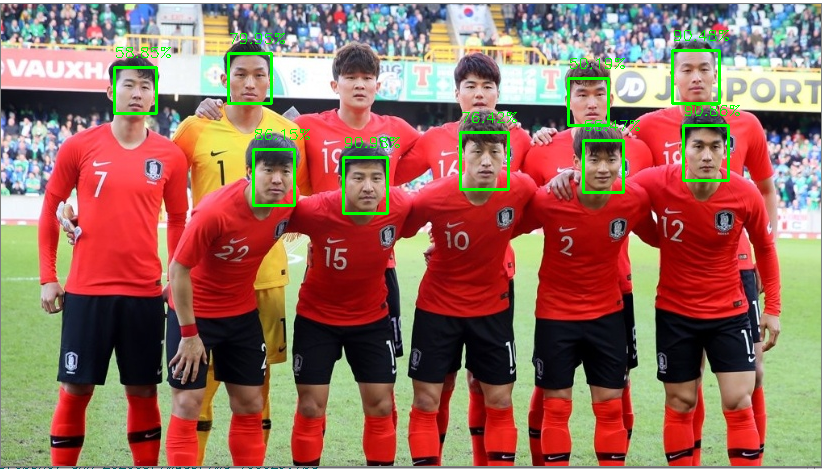